In [1]:
import os
os.environ['DJANGO_SETTINGS_MODULE'] = 'ClusterCast.settings'
import test_utils
import test_utils_models
import django
django.setup()
import sys
sys.path.append("/home/ajp031/StockDeepLearning/ClusterCast/ClusterCast")
from asgiref.sync import sync_to_async
from importlib import reload
import ClusterPipeline.models.ClusterProcessing as cp
import ClusterPipeline.models.SequencePreprocessing as sp
from copy import deepcopy
import numpy as np
from tensorflow.keras.backend import clear_session
from tslearn.metrics import dtw
import tfts
from tfts import AutoModel, KerasTrainer
import tensorflow as tf
import random

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff4c3673760>
Traceback (most recent call last):
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/remote/apps/anaconda/2023.03-acet116/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
2024-03-30 22:49:25.463536: I tensorflow/core/pl

In [2]:
reload(test_utils)

<module 'test_utils' from '/home/ajp031/ClusterCastProd/test_utils.py'>

In [3]:
group_ids = [4]
groups = await test_utils.extract_cluster_groups(group_ids)

Creating and Processing Dataset
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Empty DataFrame
Columns: []
Index: [1998-01-02 00:00:00]
Momentum Features Created
Scaling Standard
Scaling Quant Min Max Features
Quant Min Max Features Scaled
RandomForest Compete
Dataset Preprocessing Complete
Creating Sequences
Scaling Sequences
Scaling Sequences Complete
Sequence Preprocessing Complete
Loading Saved Clusters
Finished Loading Saved Clusters


In [4]:
clusters = await test_utils.get_all_clusters(groups)

cur_group = groups[0]

In [5]:
cluster_of_interest_id = 17
cluster_of_interest = [cluster for cluster in clusters if cluster.id == cluster_of_interest_id][0]

In [6]:
features = groups[0].group_params.training_features

features

['pctChgopen',
 'pctChghigh',
 'pctChglow',
 'pctChgclose',
 'pctChgvolume',
 'pctChgVix',
 'pctDiff+sma5_close',
 'pctDiff+sma5_sma10',
 'pctDiff+sma5_sma20',
 'pctDiff+sma5_sma30',
 'pctDiff+sma5_sma50',
 'pctDiff+sma5_sma100',
 'pctDiff+sma5_sma200',
 'pctDiff+sma10_sma20',
 'pctDiff+sma10_sma30',
 'pctDiff+sma10_sma50',
 'pctDiff+sma10_sma100',
 'pctDiff+sma10_sma200',
 'pctDiff+sma20_sma30',
 'pctDiff+sma20_sma50',
 'pctDiff+sma20_sma100',
 'pctDiff+sma20_sma200',
 'pctDiff+sma30_sma50',
 'pctDiff+sma30_sma100',
 'pctDiff+sma30_sma200',
 'pctDiff+sma50_sma100',
 'pctDiff+sma50_sma200',
 'pctDiff+sma100_sma200',
 'pctDiff+sma10_close',
 'pctDiff+sma20_close',
 'pctDiff+sma30_close',
 'pctDiff+sma50_close',
 'pctDiff+sma100_close',
 'pctDiff+sma200_close',
 'pctDiff+ema5_close',
 'pctDiff+ema10_close',
 'pctDiff+ema20_close',
 'pctDiff+ema30_close',
 'pctDiff+ema50_close',
 'pctDiff+ema100_close',
 'pctDiff+ema200_close',
 'pctDiff+ema5_ema10',
 'pctDiff+ema5_ema20',
 'pctDiff+ema5_

In [7]:
X_train, y_train, X_test, y_test = cluster_of_interest.get_3d_array()


In [8]:
print(X_test[0, :,0])
print(cluster_of_interest.test_seq_elements[0].seq_x[:,0])
print(cluster_of_interest.test_seq_elements[0].start_date)

[15.72 15.97 15.43 15.65 16.22 14.91 14.88 14.02 14.46 13.51 14.85 15.17
 14.7  14.78 13.57 14.63 14.74 15.74 16.59 16.05 14.33 13.77 13.41 13.5
 12.88 13.1  13.56 13.91 13.63 16.48 16.33 14.68 15.15 14.43 13.71 13.4
 13.36 13.74 13.58 12.82 13.18 14.28 13.3  13.02 12.01 12.32 12.18 12.6
 12.09 12.42 12.28 13.14 13.25 12.73 13.11 13.12 14.8  14.42 12.87 15.44
 19.32 19.4  19.1  16.04 20.55 18.06 16.44 15.29 15.96 16.31 14.95 14.75
 16.92 15.85 17.5 ]
[15.72000027 15.97000027 15.43000031 15.64999962 16.21999931 14.90999985
 14.88000011 14.02000046 14.46000004 13.51000023 14.85000038 15.17000008
 14.69999981 14.77999973 13.56999969 14.63000011 14.73999977 15.73999977
 16.59000015 16.04999924 14.32999992 13.77000046 13.40999985 13.5
 12.88000011 13.10000038 13.56000042 13.90999985 13.63000011 16.47999954
 16.32999992 14.68000031 15.14999962 14.43000031 13.71000004 13.39999962
 13.35999966 13.73999977 13.57999992 12.81999969 13.18000031 14.27999973
 13.30000019 13.02000046 12.01000023 12.3

In [9]:
print(X_test[0, :,50])
print(cluster_of_interest.test_seq_elements[-1].seq_x[:,50])
print(cluster_of_interest.test_seq_elements[-1].start_date)

[2.157654   2.399951   2.594363   2.7735581  2.9663737  3.2288883
 3.38595    3.4687371  3.5382233  3.4976811  3.4961917  3.4036148
 3.258684   3.1963272  3.194944   3.1963272  3.1265223  3.0279863
 2.8523028  2.7191832  2.5649943  2.419212   2.3356795  2.297159
 2.2676835  2.167019   2.0768895  2.0080419  1.9074839  1.8346989
 1.7026432  1.631348   1.4666241  1.3153087  1.1688879  1.0056539
 0.9091395  0.81943524 0.78846973 0.7872994  0.83901536 0.9443613
 1.0485376  1.0738634  1.0626904  1.0596048  1.0689685  1.0893996
 1.1179178  1.1520758  1.2027276  1.1812325  1.2973263  1.4497058
 1.5487744  1.6759349  1.7894751  1.8887559  1.9074842  1.8956724
 1.8495963  1.7929862  1.6880653  1.5687789  1.4879068  1.3966064
 1.3204169  1.1272817  0.97607213 0.8392281  0.7365417  0.63577133
 0.45125592 0.23620045 0.04774728]
[ 1.6036818   1.84927702  2.11083388  2.43953562  2.71918225  2.8562386
  2.98542118  3.09172511  3.24506259  3.40882826  3.56365561  3.69198704
  3.814785    3.9557786   4.

In [10]:
print(features)

['pctChgopen', 'pctChghigh', 'pctChglow', 'pctChgclose', 'pctChgvolume', 'pctChgVix', 'pctDiff+sma5_close', 'pctDiff+sma5_sma10', 'pctDiff+sma5_sma20', 'pctDiff+sma5_sma30', 'pctDiff+sma5_sma50', 'pctDiff+sma5_sma100', 'pctDiff+sma5_sma200', 'pctDiff+sma10_sma20', 'pctDiff+sma10_sma30', 'pctDiff+sma10_sma50', 'pctDiff+sma10_sma100', 'pctDiff+sma10_sma200', 'pctDiff+sma20_sma30', 'pctDiff+sma20_sma50', 'pctDiff+sma20_sma100', 'pctDiff+sma20_sma200', 'pctDiff+sma30_sma50', 'pctDiff+sma30_sma100', 'pctDiff+sma30_sma200', 'pctDiff+sma50_sma100', 'pctDiff+sma50_sma200', 'pctDiff+sma100_sma200', 'pctDiff+sma10_close', 'pctDiff+sma20_close', 'pctDiff+sma30_close', 'pctDiff+sma50_close', 'pctDiff+sma100_close', 'pctDiff+sma200_close', 'pctDiff+ema5_close', 'pctDiff+ema10_close', 'pctDiff+ema20_close', 'pctDiff+ema30_close', 'pctDiff+ema50_close', 'pctDiff+ema100_close', 'pctDiff+ema200_close', 'pctDiff+ema5_ema10', 'pctDiff+ema5_ema20', 'pctDiff+ema5_ema30', 'pctDiff+ema5_ema50', 'pctDiff+ema5

In [11]:
target_features = [] 
# target_features += ['pctChgclose{}_target'.format(i) for i in range(-14, 0) ]
# target_features += ['pctChgclose-0_target']
target_features += ['pctChgclose+{}_target'.format(i) for i in range(1, 26) ]

training_features = []
training_features = random.sample(features, 125)
# training_features += ['pctChgvolume', 'pctChgclose','pctDiff+ema50_close','pctDiff+ema10_close','deriv+ema10' ]
# training_features += ['pctChgvolume', 'pctChgclose']
# training_features = ['pctChgclose', 'pctChgvolume','pctDiff+ema50_close','pctDiff+ema10_close','deriv+ema10', 'pctChgVix','pctDiff+bb_high_close10','pctDiff+bb_low_close10', 'bb_indicator40','pctChgClOp','pctDiff+bb_high_low10','stoch_k','pctDiff+ema10_close' ]
# training_features = "pctDiff+bb_low_close20, pctDiff+bb_high_close10, pctDiff+bb_high_low60, stoch_k, pctChgclose, deriv+sma10, hiLo, rsi10, pctDiff+sma5_sma50, pctDiff+sma10_sma20, deriv+ema20, pctDiff+ema20_ema100, pctDiff+ema30_ema50, deriv+ema30, deriv+sma200, pctDiff+sma50_sma100, pctDiff+sma20_close, opLo, pctChgvolume, pctDiff+bb_low_close60"
# training_features = "rsi100, pctDiff+bb_high_low60, pctDiff+ema5_ema200, rsi20, deriv+sma5, pctDiff+ema20_ema100, bb_indicator20, pctDiff+bb_high_low20, bb_indicator60, pctDiff+ema30_ema200, pctChglow, rsi50, stoch_d, pctDiff+sma200_close, hiLo, pctDiff+bb_high_low40, pctDiff+bb_low_close60, pctDiff+sma30_sma200, pctDiff+sma10_close, bb_indicator10"
# training_features = [item.strip() for item in training_features.split(",")]
print(training_features)
y_feature_sets = cur_group.group_params.y_feature_sets
# training_features += ['pctChgclose']


['pctDiff+ema20_ema30', 'pctDiff+ema20_ema50', 'pctDiff+sma30_sma50', 'pctDiff+sma10_sma200', 'pctDiff+sma5_sma100', 'pctDiff+bb_high_close20', 'deriv+sma50', 'pctDiff+ema20_close', 'pctDiff+sma50_sma100', 'bb_indicator20', 'pctDiff+smaVol50_volume', 'pctDiff+ema10_ema20', 'deriv+ema100', 'deriv+ema10', 'pctChgclose', 'pctDiff+sma200_close', 'deriv+ema20', 'pctDiff+sma100_close', 'pctDiff+sma5_close', 'bb_indicator10', 'pctDiff+ema5_ema50', 'pctDiff+ema100_ema200', 'pctDiff+smaVol5_smaVol20', 'pctDiff+ema10_close', 'pctDiff+smaVol10_smaVol50', 'rsi10', 'pctDiff+sma5_sma10', 'pctDiff+ema5_ema10', 'pctDiff+smaVol5_smaVol10', 'pctDiff+bb_low_close20', 'pctDiff+sma30_sma100', 'deriv+smaVol20', 'pctDiff+ema10_ema50', 'rsi20', 'pctDiff+ema50_ema100', 'deriv+ema50', 'pctDiff+ema30_ema50', 'deriv+sma10', 'pctDiff+smaVol10_smaVol20', 'pctDiff+ema100_close', 'pctDiff+ema5_close', 'macd', 'pctDiff+bb_high_low60', 'rsi50', 'pctDiff+ema50_close', 'pctChgClLo', 'pctDiff+smaVol5_smaVol50', 'pctDiff+s

In [12]:
# for feature_set in y_feature_sets:
#     print(feature_set)
#     print(type(feature_set))
y_feature_sets = y_feature_sets[:-1]

In [13]:
reload(test_utils)
reload(test_utils_models)

<module 'test_utils_models' from '/home/ajp031/ClusterCastProd/test_utils_models.py'>

In [14]:
print(target_features)
print(len(target_features))

['pctChgclose+1_target', 'pctChgclose+2_target', 'pctChgclose+3_target', 'pctChgclose+4_target', 'pctChgclose+5_target', 'pctChgclose+6_target', 'pctChgclose+7_target', 'pctChgclose+8_target', 'pctChgclose+9_target', 'pctChgclose+10_target', 'pctChgclose+11_target', 'pctChgclose+12_target', 'pctChgclose+13_target', 'pctChgclose+14_target', 'pctChgclose+15_target', 'pctChgclose+16_target', 'pctChgclose+17_target', 'pctChgclose+18_target', 'pctChgclose+19_target', 'pctChgclose+20_target', 'pctChgclose+21_target', 'pctChgclose+22_target', 'pctChgclose+23_target', 'pctChgclose+24_target', 'pctChgclose+25_target']
25


In [15]:
y_feature_dict = cur_group.y_feature_dict
X_feature_dict = cur_group.X_feature_dict

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_feature_dict)

(524, 75, 517)
(524, 55)
(108, 75, 517)
(108, 55)
{'pctChgclose+10_target': 0, 'pctChgclose+11_target': 1, 'pctChgclose+12_target': 2, 'pctChgclose+13_target': 3, 'pctChgclose+14_target': 4, 'pctChgclose+15_target': 5, 'pctChgclose+16_target': 6, 'pctChgclose+17_target': 7, 'pctChgclose+18_target': 8, 'pctChgclose+19_target': 9, 'pctChgclose+1_target': 10, 'pctChgclose+20_target': 11, 'pctChgclose+21_target': 12, 'pctChgclose+22_target': 13, 'pctChgclose+23_target': 14, 'pctChgclose+24_target': 15, 'pctChgclose+25_target': 16, 'pctChgclose+2_target': 17, 'pctChgclose+3_target': 18, 'pctChgclose+4_target': 19, 'pctChgclose+5_target': 20, 'pctChgclose+6_target': 21, 'pctChgclose+7_target': 22, 'pctChgclose+8_target': 23, 'pctChgclose+9_target': 24, 'pctChgclose-0_target': 25, 'pctChgclose-10_target': 26, 'pctChgclose-11_target': 27, 'pctChgclose-12_target': 28, 'pctChgclose-13_target': 29, 'pctChgclose-14_target': 30, 'pctChgclose-1_target': 31, 'pctChgclose-2_target': 32, 'pctChgclose-3

In [16]:

X_train_filtered = test_utils.filter_by_features(X_train, training_features, X_feature_dict)
X_test_filtered = test_utils.filter_by_features(X_test, training_features, X_feature_dict)
y_train_filtered = test_utils.filter_y_by_features(y_train, target_features, y_feature_dict)
y_test_filtered = test_utils.filter_y_by_features(y_test, target_features, y_feature_dict)
print(X_train_filtered.shape)
print(y_train_filtered.shape)
print(X_test_filtered.shape)
print(y_test_filtered.shape)

[10, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]
[10, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]
(524, 75, 125)
(524, 25)
(108, 75, 125)
(108, 25)


In [17]:
print(X_train_filtered[25, 0,:])

[ 1.0439200e+00  4.3446243e-01  3.9712268e-01 -1.4567654e-01
  1.6100875e-01 -6.4362109e-02 -1.5427904e+00  1.7990948e+00
 -1.6222450e+00  8.0532503e-01 -1.1648712e+00  1.9150844e+00
 -4.0003327e-01  1.5384673e+00 -6.1746663e-01  1.3447332e-01
  8.7179917e-01  3.5030258e-01  8.6790115e-01  9.6490777e-01
  1.2839686e+00 -5.3595775e-01 -1.3672101e+00  1.4044931e+00
 -1.7211750e+00  1.1830869e+00  1.1512418e+00  1.9269519e+00
 -1.1936886e-01 -3.6132097e+00 -1.0190337e+00 -4.1788075e-02
  9.9072874e-01  8.1629032e-01 -4.7403175e-01 -1.1250942e+00
  3.9368175e-02  1.8790033e+00 -2.1125846e+00  7.3524559e-01
  8.3134317e-01  1.2770004e+00  6.4091641e-01  1.3438156e-01
  1.3684841e+00 -3.1036481e-01 -1.4188095e+00 -4.2712307e-01
  9.2307401e-01 -8.2237966e-02  1.7559521e+00  1.9305018e+00
  7.3500180e-01 -5.4830796e-01  2.5216224e+00  2.3793285e+00
  5.8556497e-01 -3.2543394e-01 -7.3934458e-02  2.6365593e-01
  4.6230146e-01  2.1207349e+00 -3.1672916e-01  1.5469263e+00
 -1.7698635e-01  2.25064

In [18]:
print(y_train_filtered[25, :])

[-0.02528402 -0.91067094 -0.48926601 -0.20784175  0.14329177 -0.45522717
  0.27556881  0.6526289   1.          0.33483389 -0.12538189  0.45247623
  0.5731293  -0.49288881  0.73403525 -0.19626342 -0.22164088  0.82856202
 -0.99800664  0.09929037 -1.          0.29337746  1.         -0.37287799
  1.        ]


In [19]:
model = test_utils_models.CustomSeq2SeqModel(len(target_features), X_train_filtered.shape[1], X_train_filtered.shape[2])

In [20]:
training_model = test_utils.train_model(model, (X_train, y_train, X_test, y_test), training_features, 
                                                   target_features, X_feature_dict, y_feature_dict,
                                                   epochs = 100, batch_size = 15, lr = 0.0001, early_stopping_patience = 15,
                                                   loss = 'mse')

[10, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]
[10, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]
Epoch 1/100


2024-03-30 22:50:19.492392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-30 22:50:19.494674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-30 22:50:19.496262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

34/35 [============================>.] - ETA: 0s - loss: 0.1863

2024-03-30 22:50:44.291358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-30 22:50:44.293835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-30 22:50:44.295555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Attention Weights Shape:  (None, 25, 75)
35/35 [==============================] - 29s 183ms/step - loss: 0.1829 - val_loss: 0.1760
Epoch 2/100
35/35 [==============================] - 2s 61ms/step - loss: 0.1785 - val_loss: 0.1757
Epoch 3/100
35/35 [==============================] - 2s 61ms/step - loss: 0.1781 - val_loss: 0.1766
Epoch 4/100
35/35 [==============================] - 2s 60ms/step - loss: 0.1774 - val_loss: 0.1782
Epoch 5/100
35/35 [==============================] - 2s 61ms/step - loss: 0.1769 - val_loss: 0.1799
Epoch 6/100
35/35 [==============================] - 2s 62ms/step - loss: 0.1765 - val_loss: 0.1815
Epoch 7/100
35/35 [==============================] - 2s 61ms/step - loss: 0.1760 - val_loss: 0.1819
Epoch 8/100
35/35 [==============================] - 2s 62ms/step - loss: 0.1758 - val_loss: 0.1821
Epoch 9/100
35/35 [==============================] - 2s 61ms/step - loss: 0.1756 - val_loss: 0.1814
Epoch 10/100
35/35 [==============================] - 2s 61ms/step - 

In [21]:
num_days = len(target_features)
attention_model_accuracy, attention_results, predicted_y, attention_weights = test_utils.eval_model(X_test_filtered, y_test_filtered, model,num_days,test_model= True)

2024-03-30 22:51:23.077078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-30 22:51:23.079293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-30 22:51:23.080955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Attention Weights Shape:  (None, 25, 75)
4/4 [==============================] - 4s 26ms/step
<class 'tuple'> 2
(108, 25)
25


In [22]:
attention_weights.shape

(108, 25, 75)

In [23]:
predicted_y_transformed = np.zeros_like(predicted_y)
for i, feature in enumerate(target_features):
    scaler = [feature_set for feature_set in y_feature_sets if feature == feature_set.name][0].scaler
    predicted_y_transformed[:, i] = scaler.inverse_transform(predicted_y[:, i].reshape(-1, 1)).reshape(-1)

In [24]:
reload(test_utils)
reload(sp)
reload(test_utils_models)

<module 'test_utils_models' from '/home/ajp031/ClusterCastProd/test_utils_models.py'>

In [25]:
print(attention_model_accuracy)

test_utils.visualize_future_distribution(attention_results)

Cluster Number:
Accuracy1D 48.15% PredictedRet: 0.017732596024870872 ActRet: -8.642185625999614e-05
Accuracy2D 46.3% PredictedRet: 0.07141339778900146 ActRet: 0.009209694595214117
Accuracy3D 51.85% PredictedRet: 0.14776183664798737 ActRet: 0.042350825226296566
Accuracy4D 47.22% PredictedRet: 0.23721367120742798 ActRet: 0.09751647332019207
Accuracy5D 51.85% PredictedRet: 0.3332504332065582 ActRet: 0.1606642426146815
Accuracy6D 53.7% PredictedRet: 0.43154868483543396 ActRet: 0.2227764637640643
Accuracy7D 50.93% PredictedRet: 0.529321014881134 ActRet: 0.30240492483911413
Accuracy8D 53.7% PredictedRet: 0.6248555779457092 ActRet: 0.41136479818400135
Accuracy9D 58.33% PredictedRet: 0.7171948552131653 ActRet: 0.4676939233775354
Accuracy10D 62.96% PredictedRet: 0.8059055209159851 ActRet: 0.5428434054936386
Accuracy11D 68.52% PredictedRet: 0.8909111618995667 ActRet: 0.6370921457634756
Accuracy12D 70.37% PredictedRet: 0.9723678827285767 ActRet: 0.7308611458456317
Accuracy13D 70.37% PredictedRet:

[]


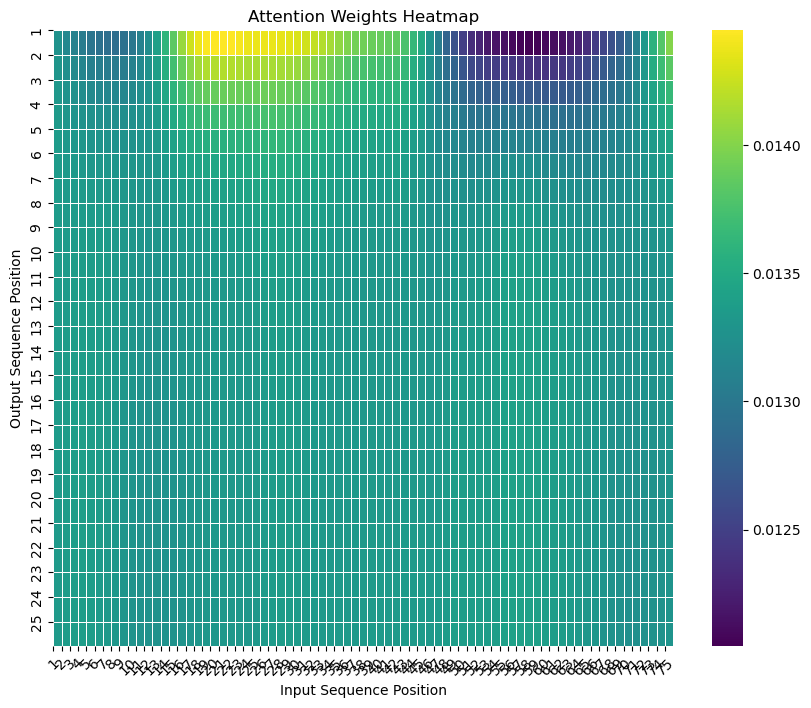

(25,)
25


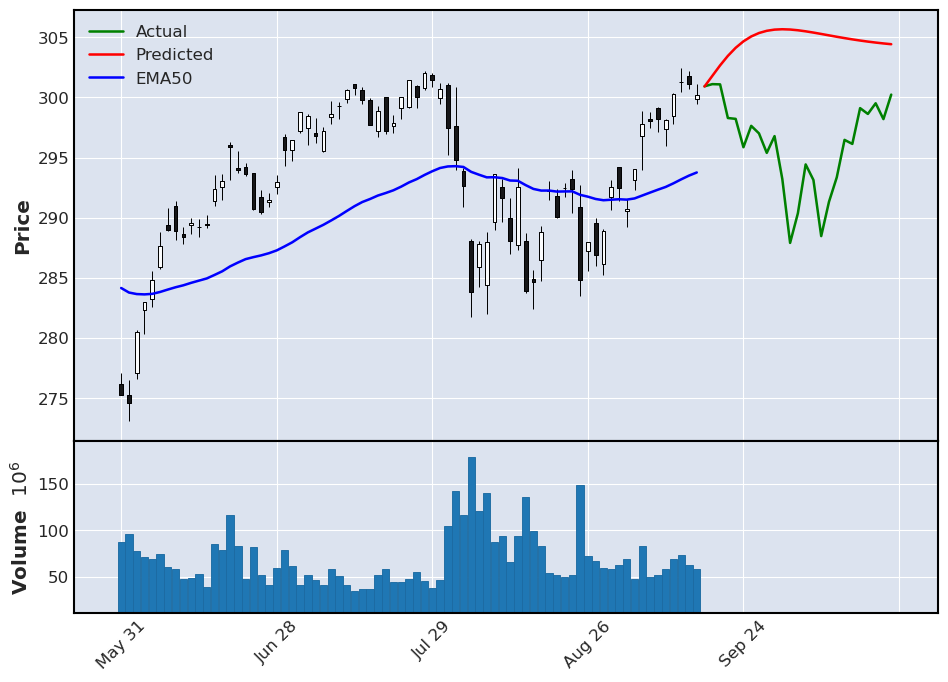

[]


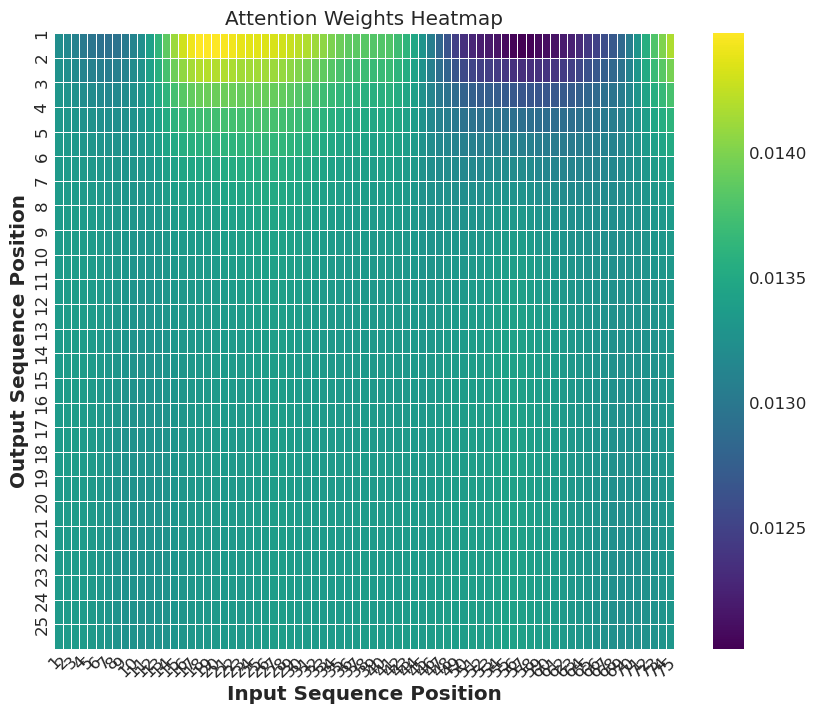

(25,)
25


[]


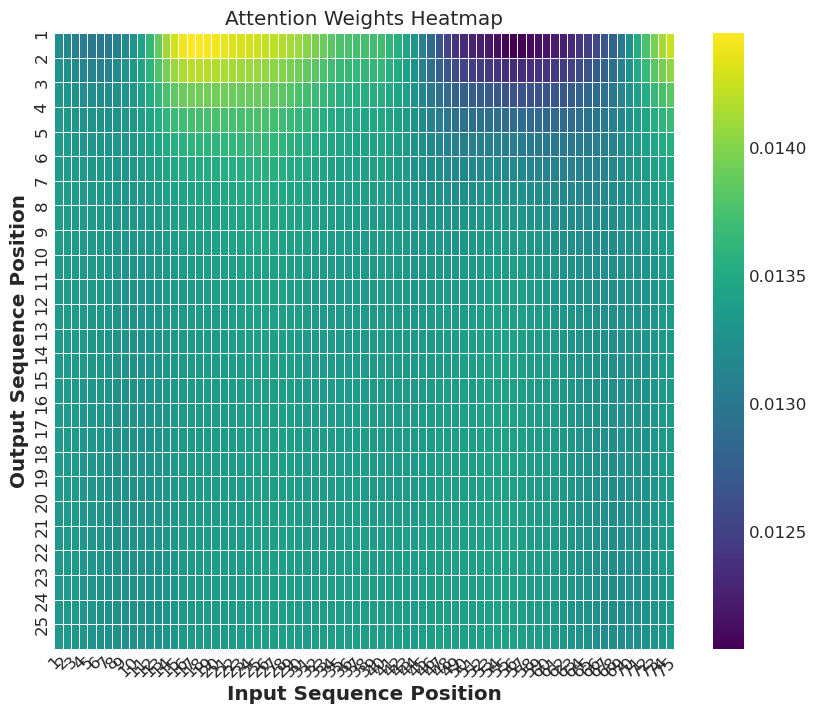

(25,)
25


[]


(25,)
25
DatetimeIndex(['2020-10-20'], dtype='datetime64[ns]', freq='C')


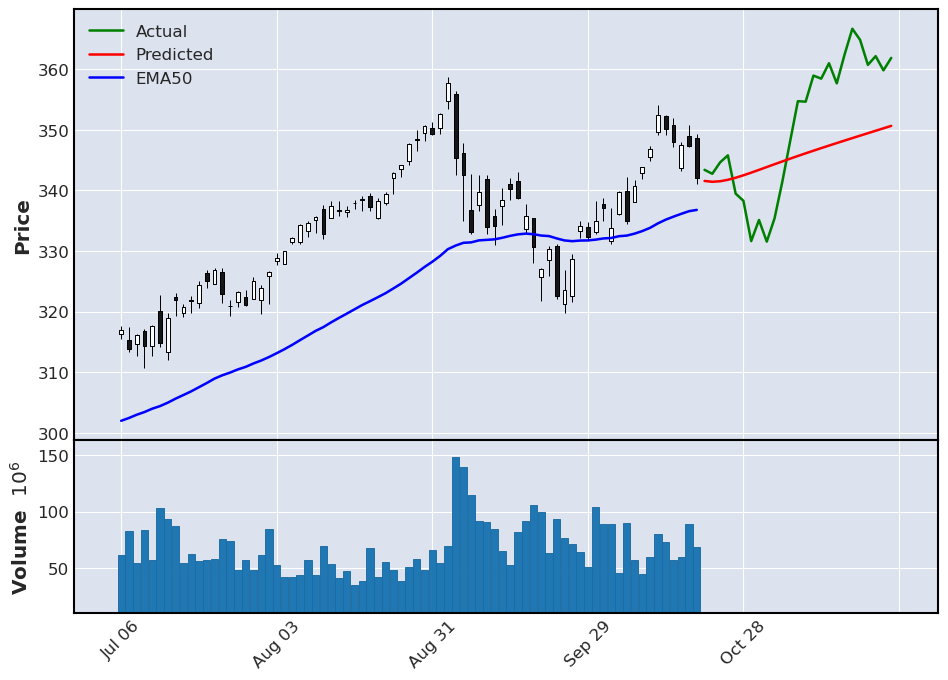

[]


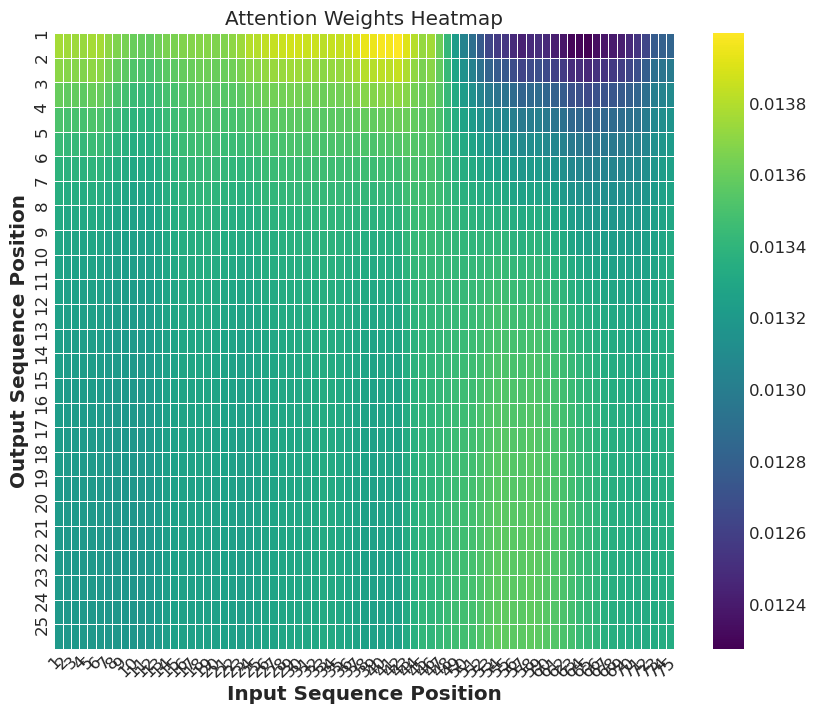

(25,)
25
DatetimeIndex(['2020-10-21'], dtype='datetime64[ns]', freq='C')


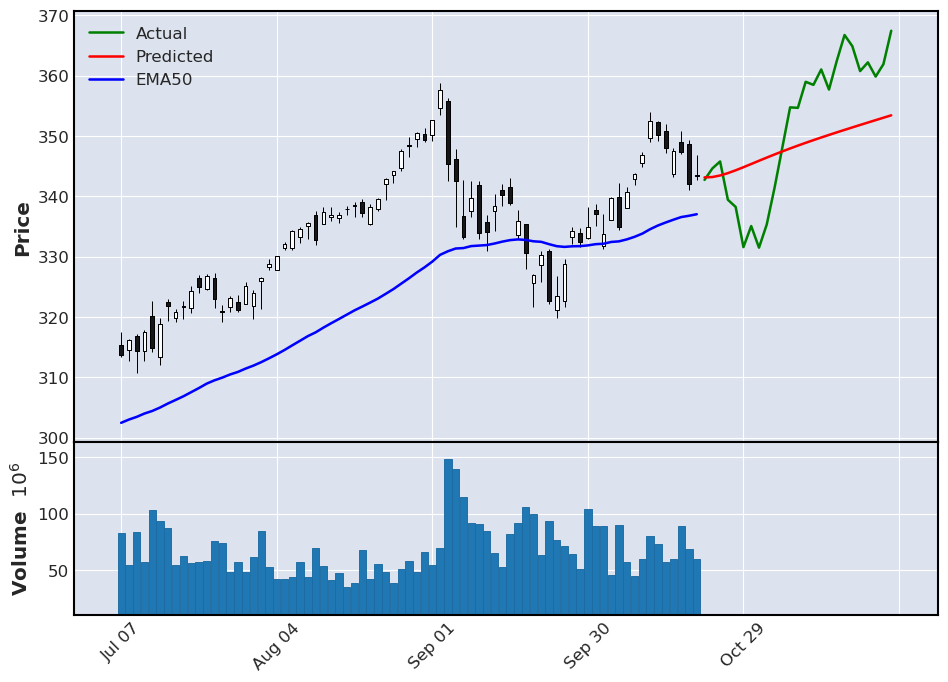

[]


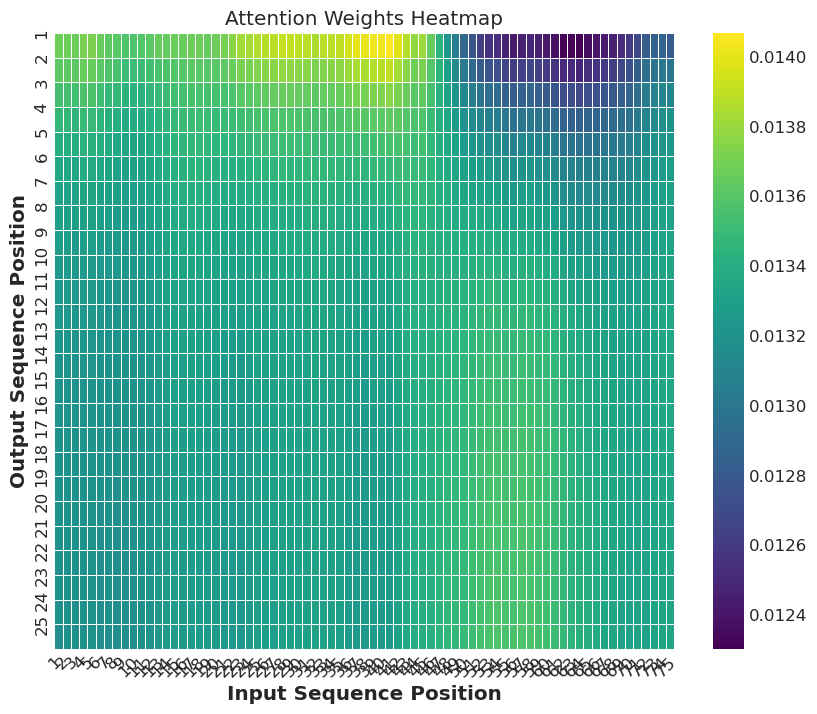

(25,)
25
DatetimeIndex(['2020-10-22'], dtype='datetime64[ns]', freq='C')


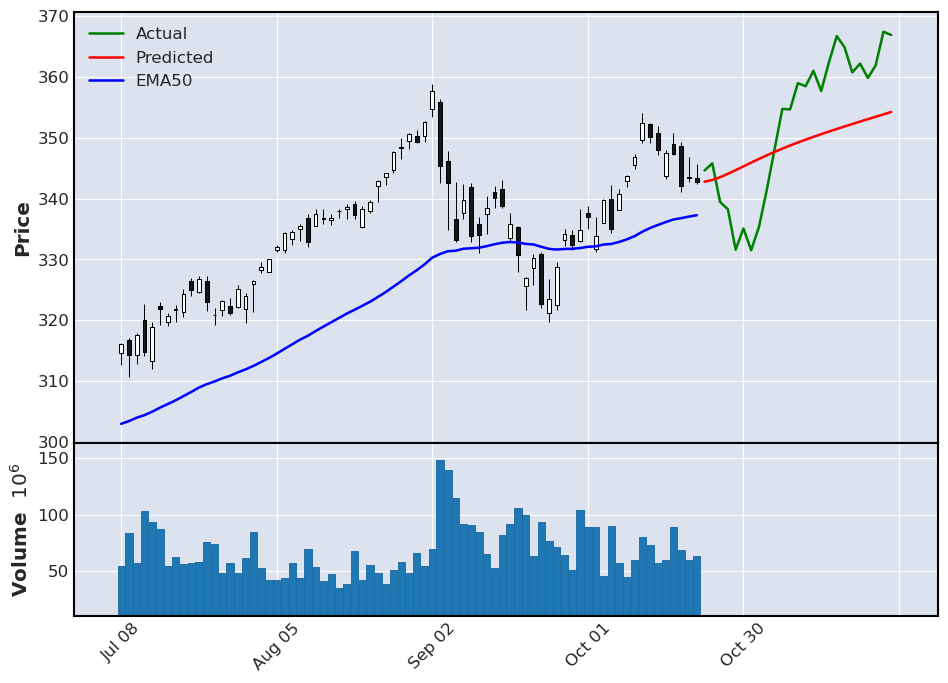

[]


(25,)
25
DatetimeIndex(['2020-10-23'], dtype='datetime64[ns]', freq='C')


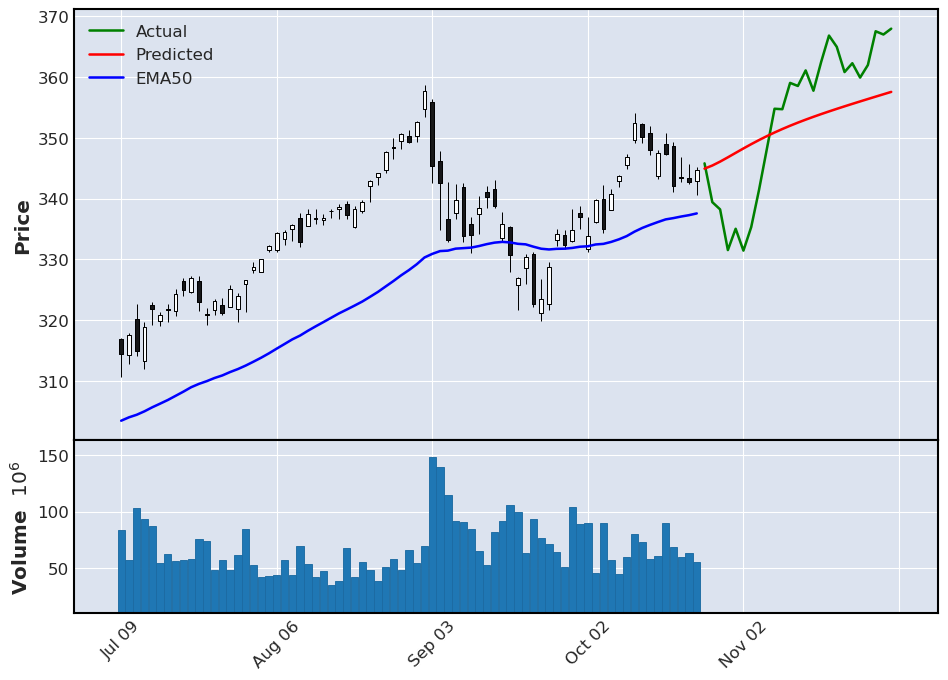

[]


(25,)
25
DatetimeIndex(['2020-10-26'], dtype='datetime64[ns]', freq='C')


[]


(25,)
25
DatetimeIndex(['2020-10-27'], dtype='datetime64[ns]', freq='C')


[]


(25,)
25
DatetimeIndex(['2020-10-28'], dtype='datetime64[ns]', freq='C')


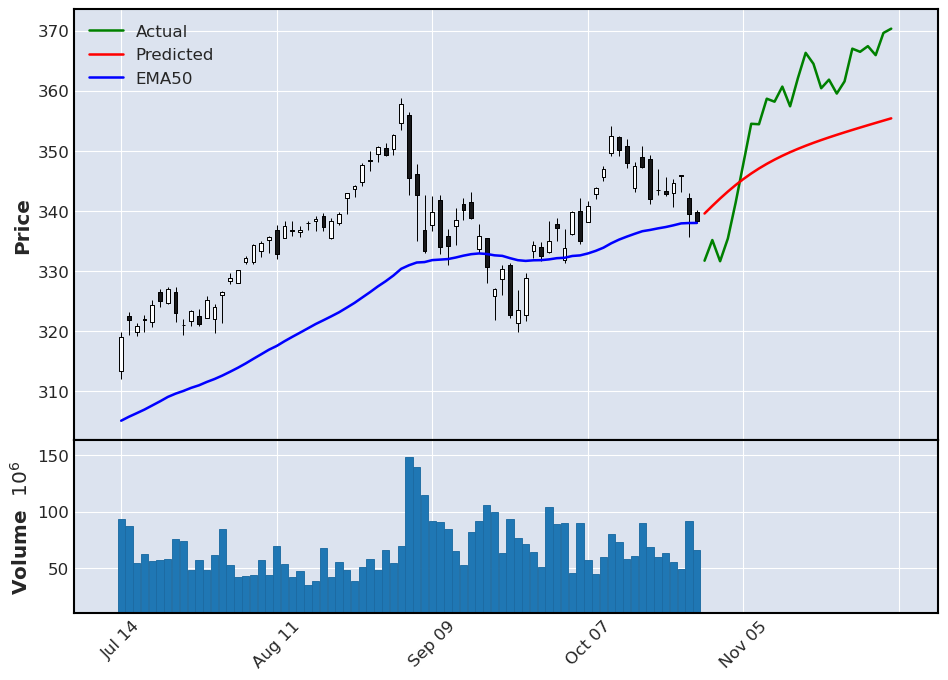

[]


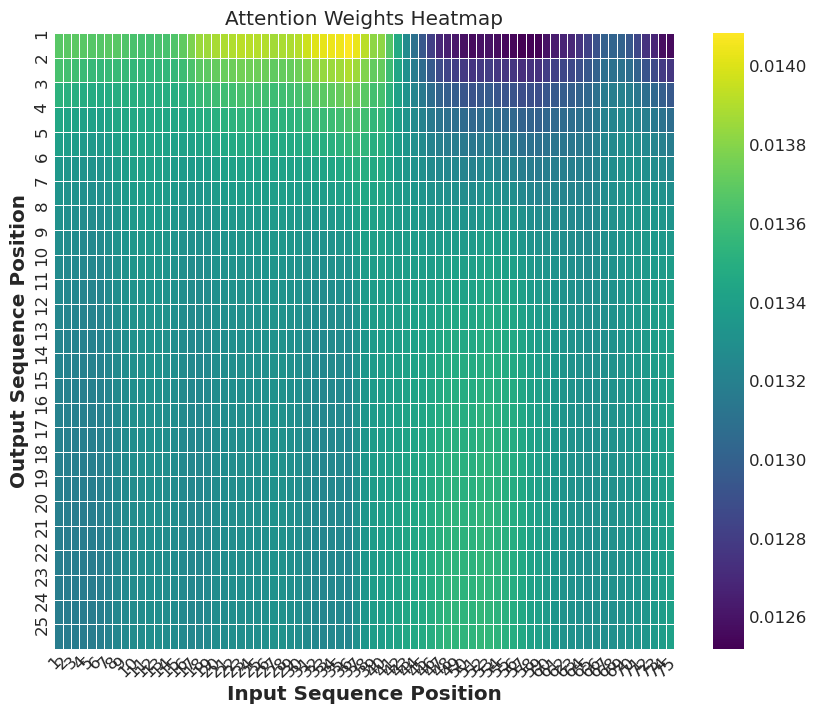

(25,)
25
DatetimeIndex(['2020-10-29'], dtype='datetime64[ns]', freq='C')


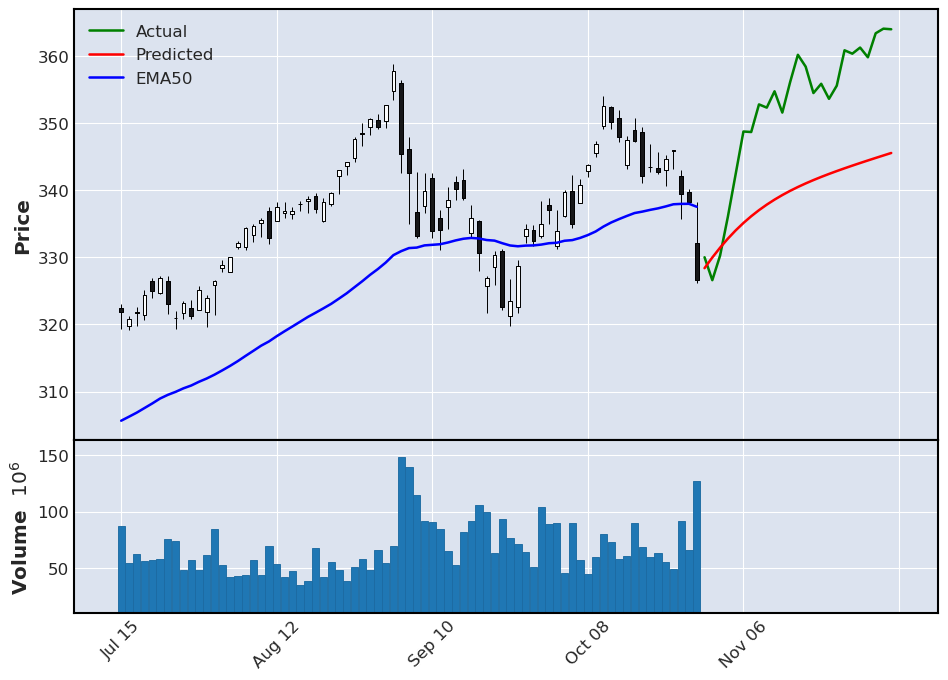

[]


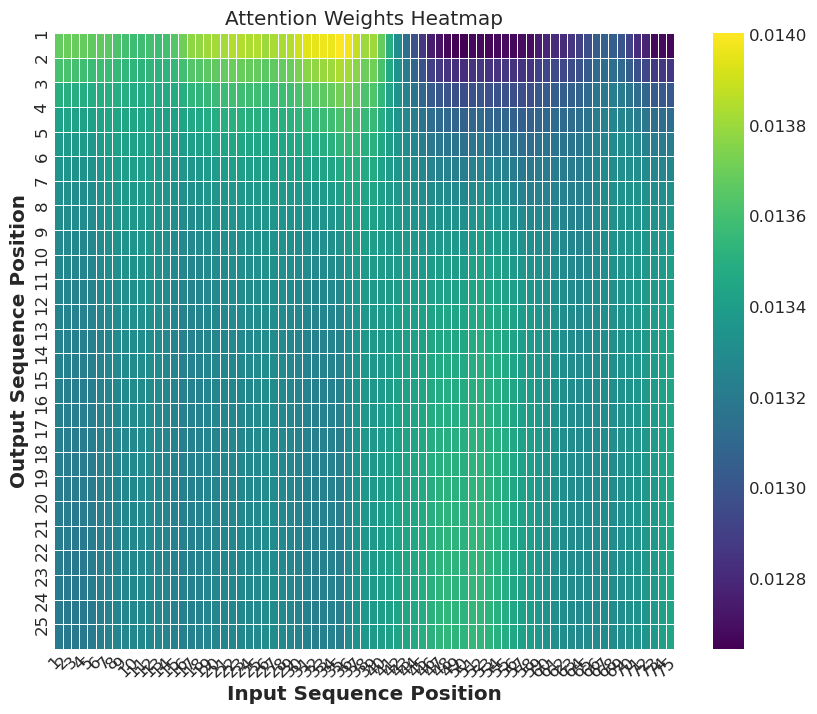

(25,)
25
DatetimeIndex(['2020-10-30'], dtype='datetime64[ns]', freq='C')


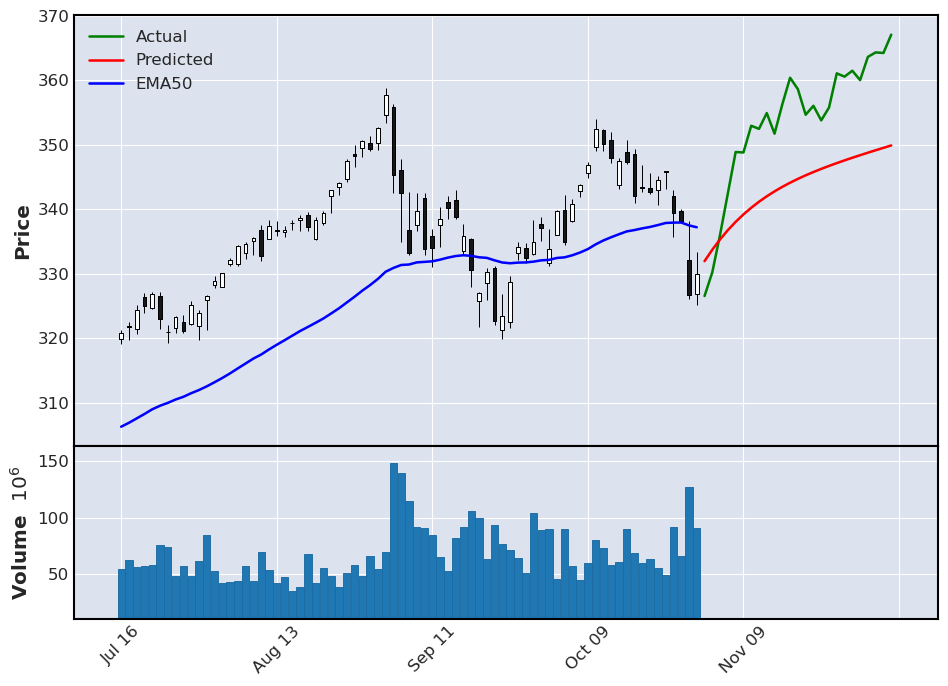

[]


(25,)
25
DatetimeIndex(['2020-11-02'], dtype='datetime64[ns]', freq='C')


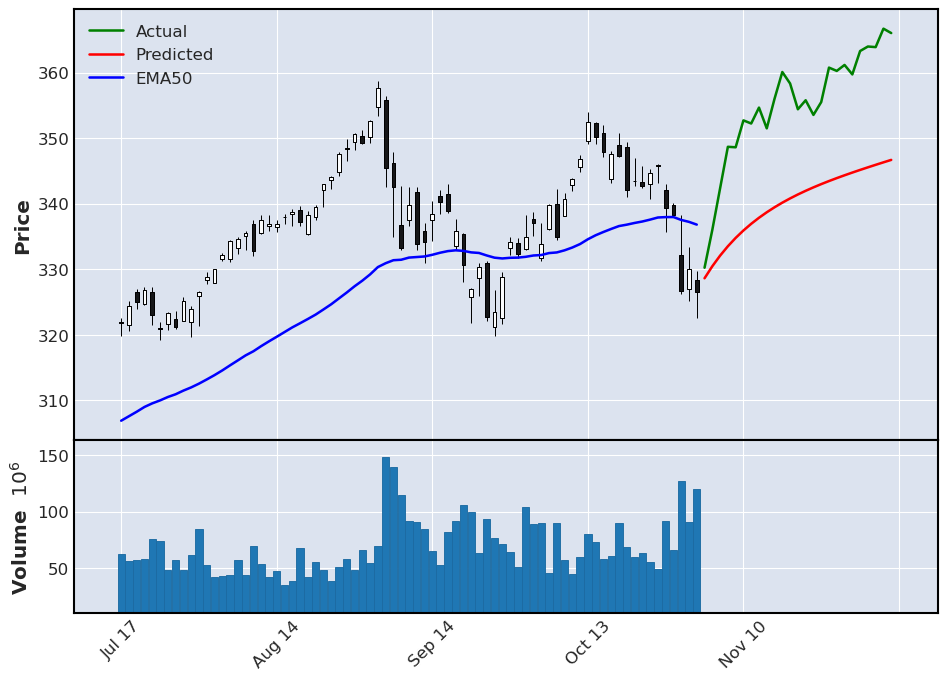

[]


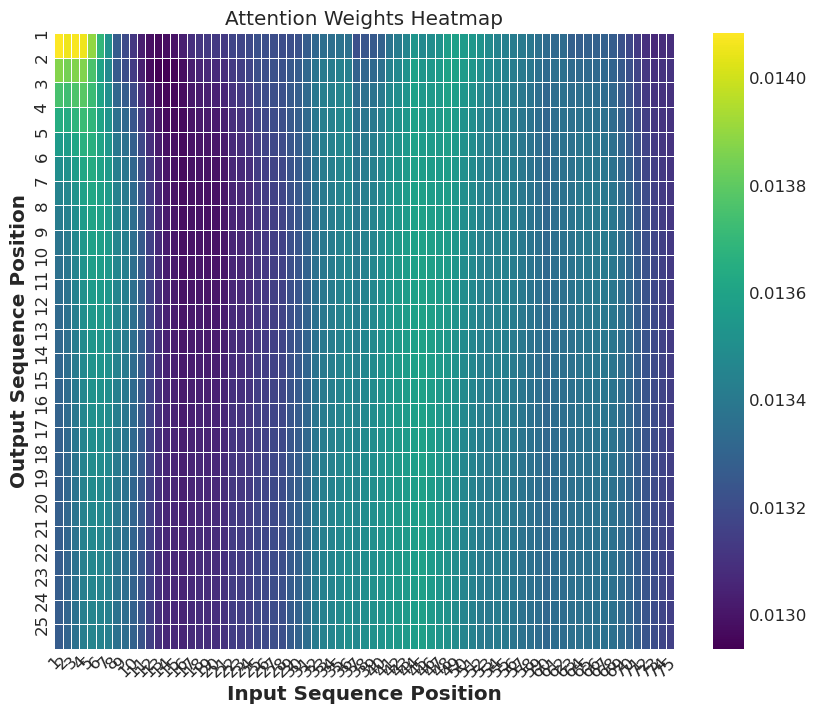

(25,)
25
DatetimeIndex(['2021-02-18'], dtype='datetime64[ns]', freq='C')


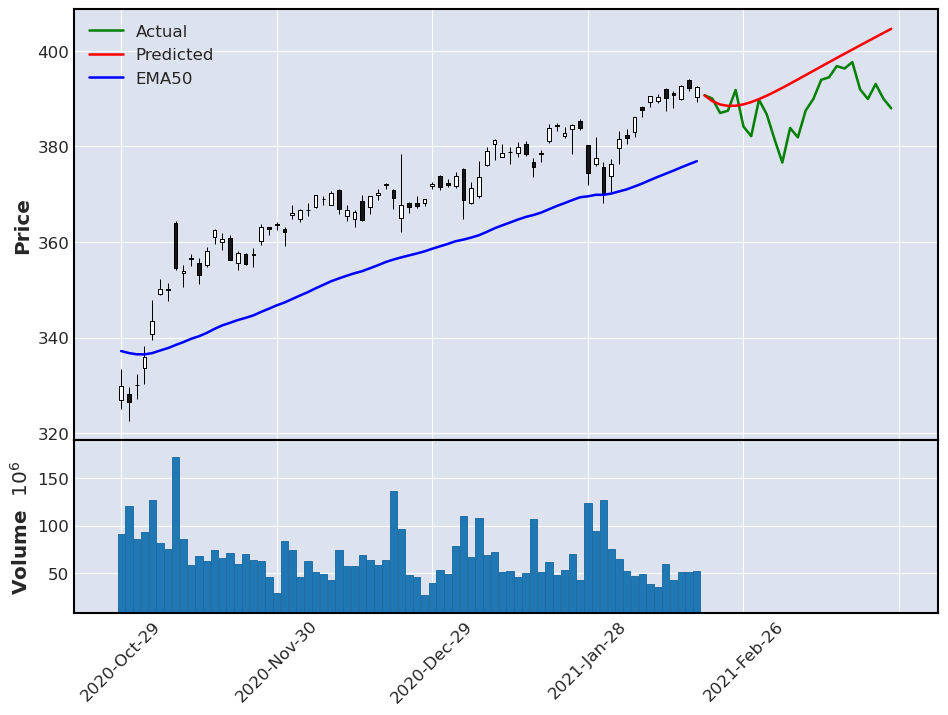

[]


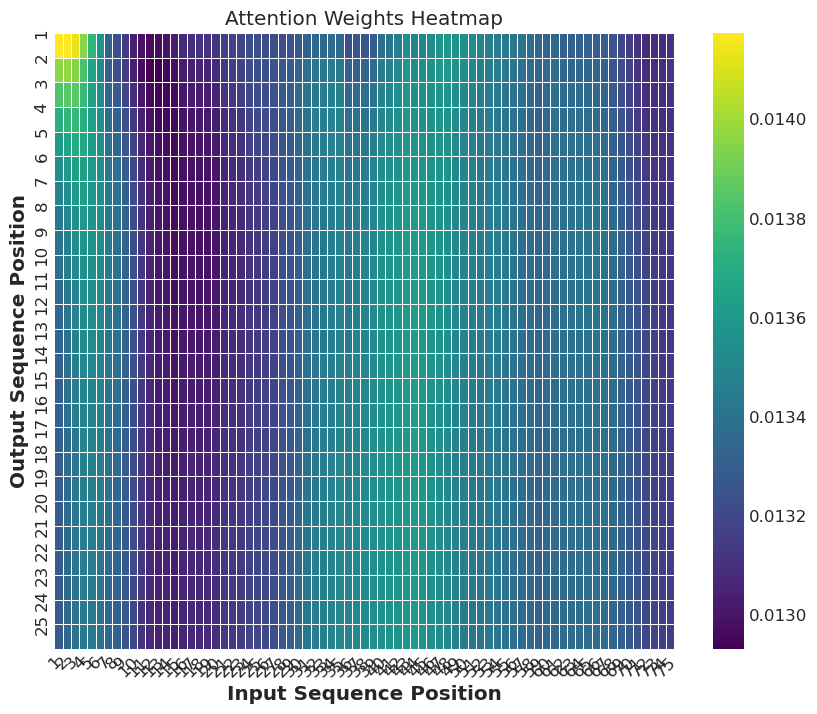

(25,)
25
DatetimeIndex(['2021-02-19'], dtype='datetime64[ns]', freq='C')


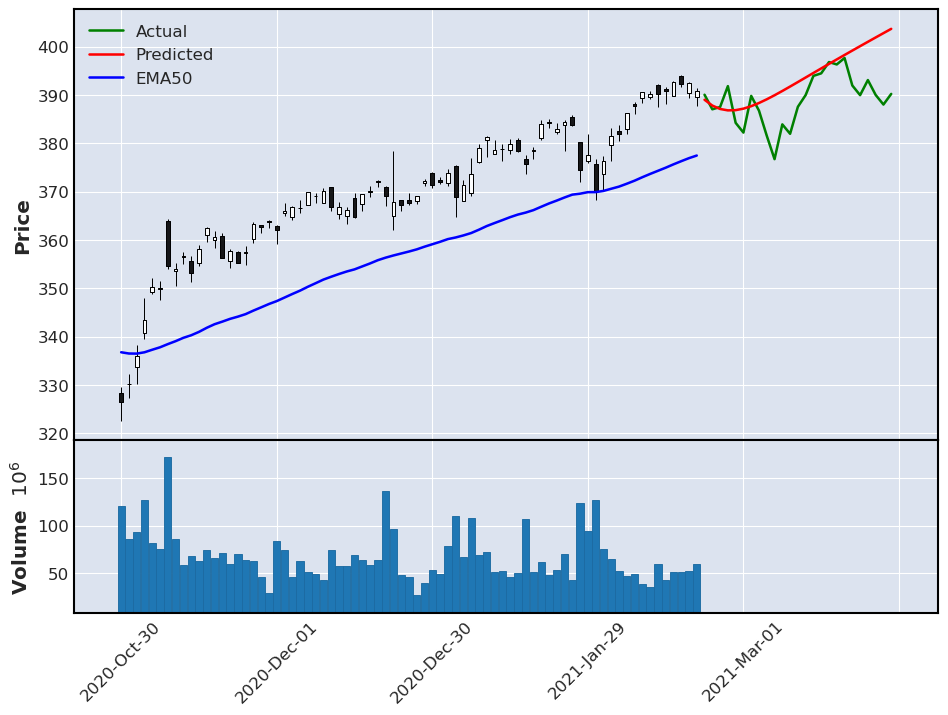

[]


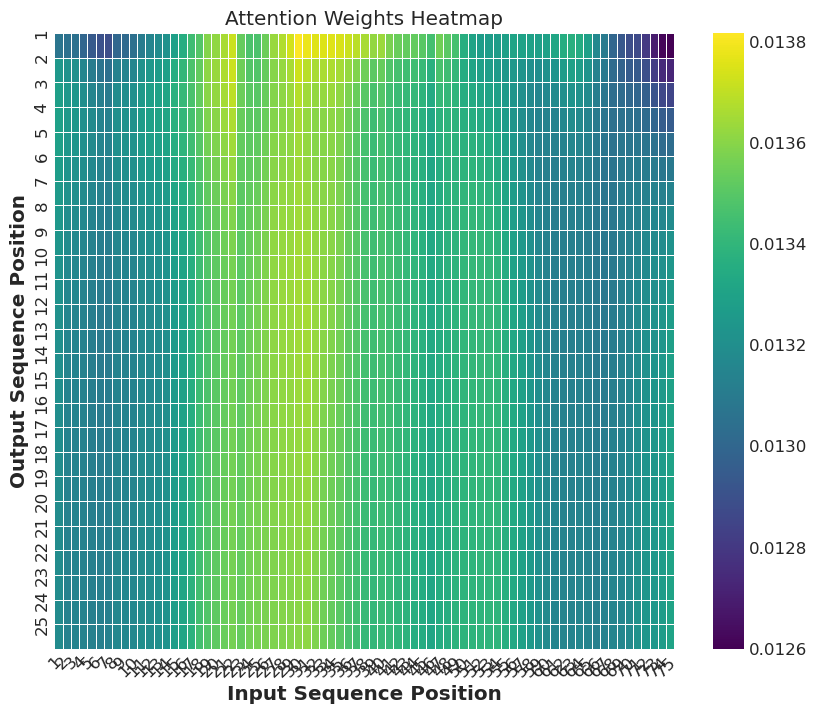

(25,)
25


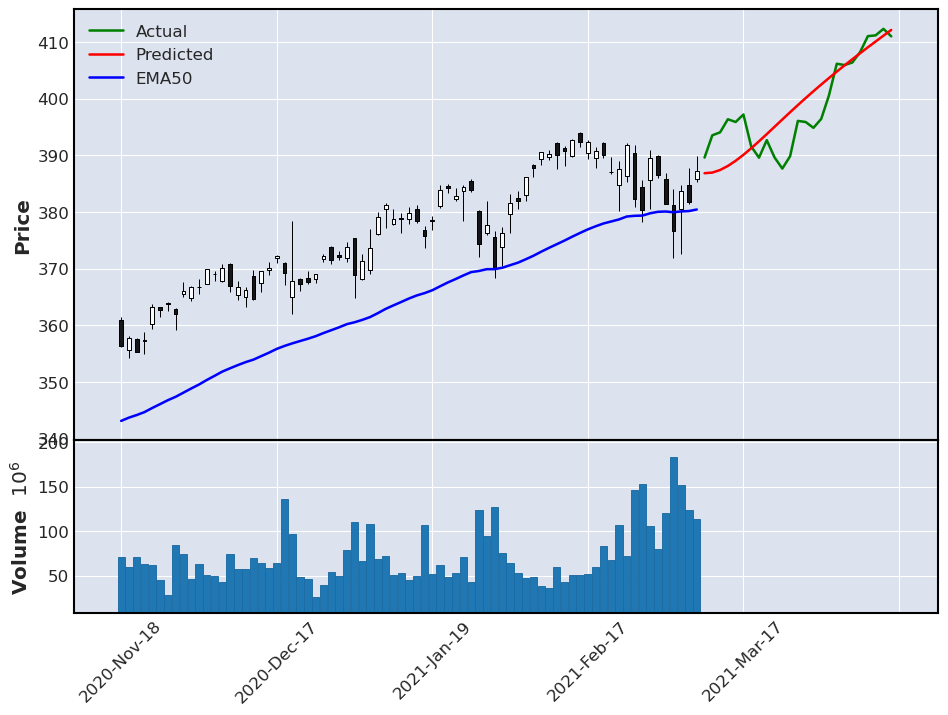

[]


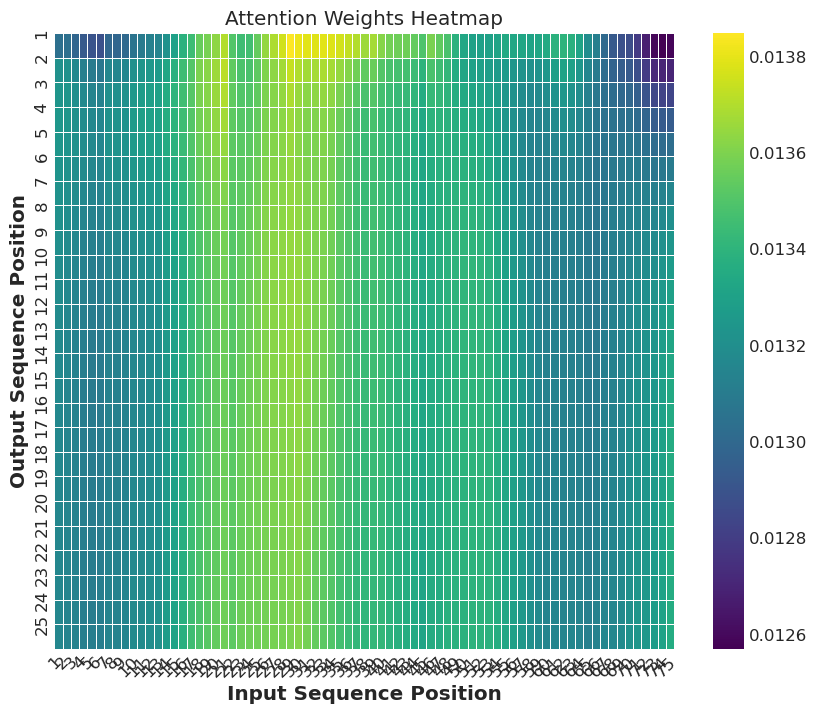

(25,)
25


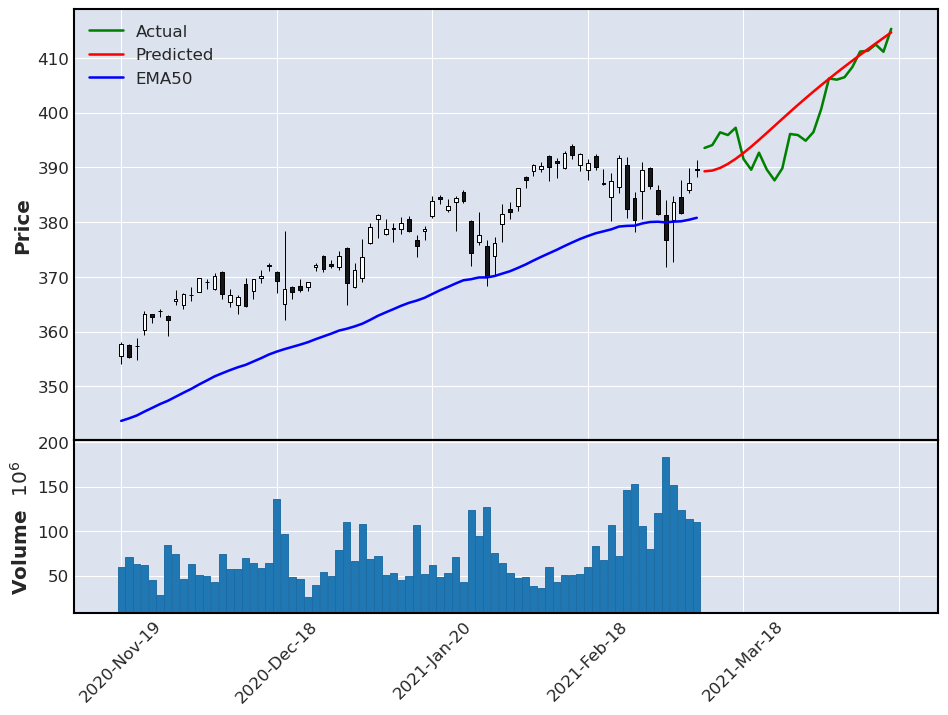

[]


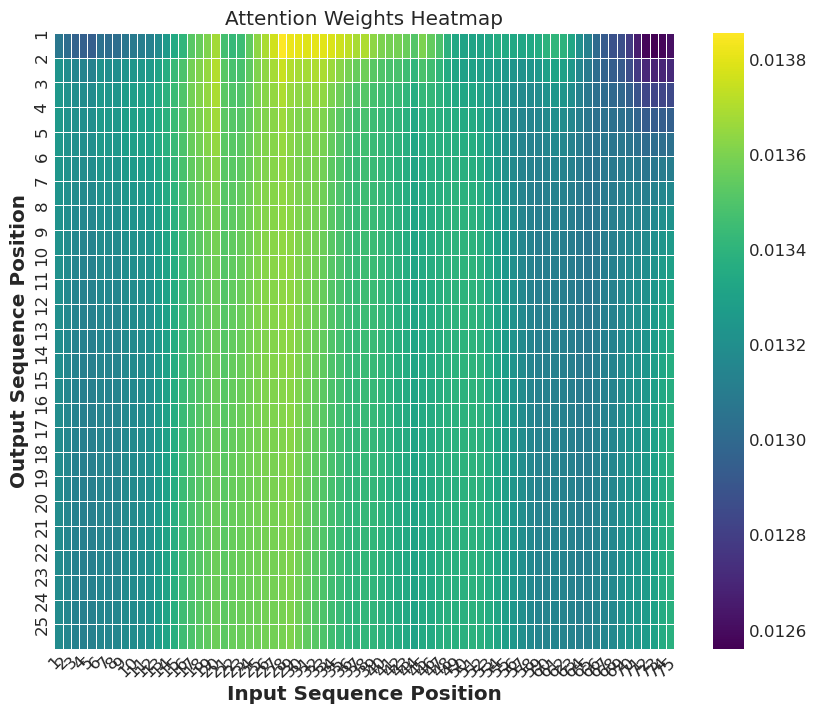

(25,)
25


[]


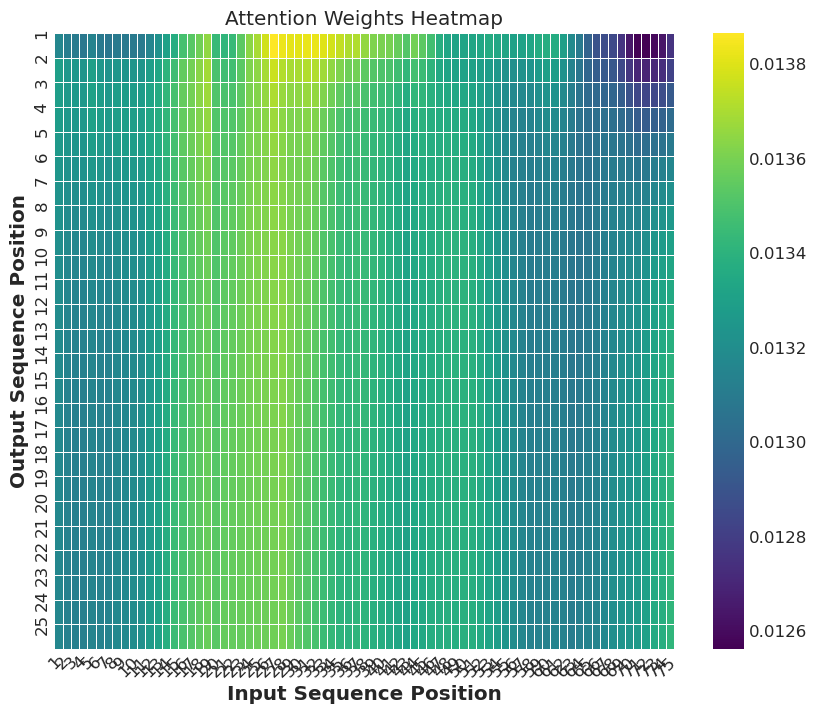

(25,)
25


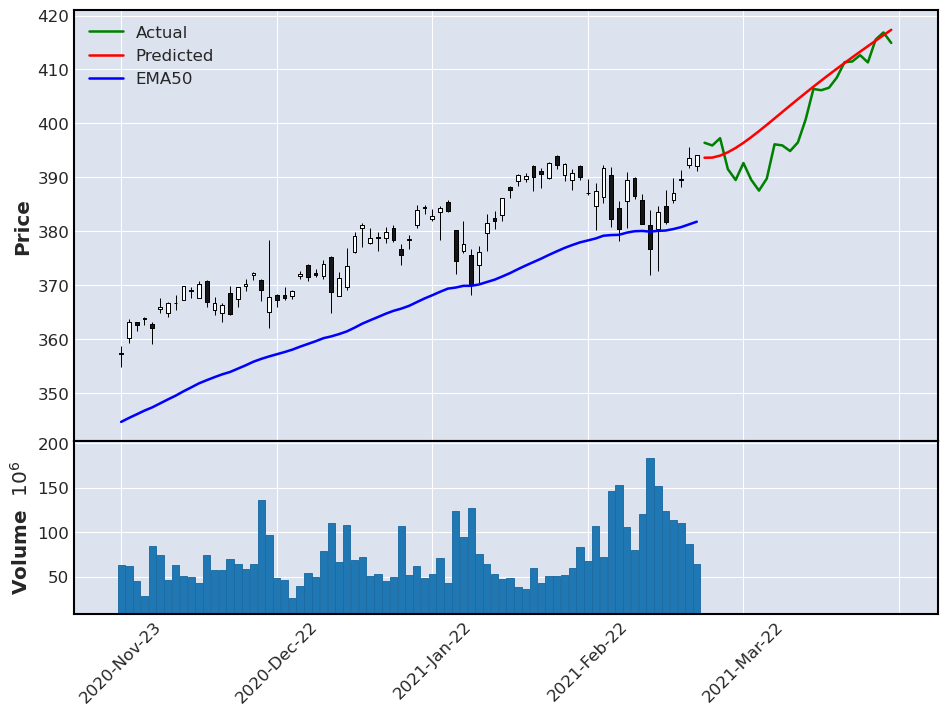

[]


(25,)
25


In [26]:


for i in range(20,40):
    attention_weight = attention_weights[i]
    sequence_element = cluster_of_interest.test_seq_elements[i]
    prediction = predicted_y_transformed[i]
    print(sequence_element.y_feature_sets)
    plot = test_utils.plot_attention_weights_single(attention_weight)
    # plot.show()
    sp.SequenceElement.visualize_future_movement_mpl(sequence_element, prediction, scaler, isCuma = False, target_features=target_features, num_days=num_days)